In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Upper Confidence Bound

### Data Prep

#### Read

In [88]:
dataset = pd.read_csv('data/ReinforcementData1.csv')
dataset.head(2)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0


In [89]:
dataset.shape

(10000, 10)

### Implement UCB

In [160]:
import math

N = 5000   # Number of rounds for which to run the test (rows in the dataset)
d = 10      # Total number of options (columns in the dataset)
ads_selected = []
numbers_of_selections = [0] * d   # List of 10 0s, N_i(n)
sums_of_rewards = [0] * d         # List of 10 0s, R_i(n)
# total_reward = 0

In [161]:
numbers_of_selections, sums_of_rewards

([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [162]:
for n in range(0, N):
    ad = 0
    max_upper_bound = 0
    average_reward = 0
    
    # The first round (n=0) is a trial round where each of the 10 ads are selected once
    for i in range(0, d):
        # print("ROUND {} LOOP {}: Number of Selections = {}, Sum of Rewards = {}".format(n, i, numbers_of_selections[i], sums_of_rewards[i]))

        # For the first round, ensure each ad is selected once
        if (numbers_of_selections[i] == 0):
            numbers_of_selections[i] += 1   # Increment the index of the selection by 1
            sums_of_rewards[i] = dataset.values[n, i]  # Check whether the selected ad has a reward in the actual dataset
            
        average_reward = sums_of_rewards[i] / numbers_of_selections[i]
        delta_i = math.sqrt(1.5 * math.log(n + 1) / numbers_of_selections[i])
        upper_bound = average_reward + delta_i
        # upper_bound = 1e400   # set upper bound to infinity
        # print("Average Reward = {}, Upper Bound = {}".format(average_reward, upper_bound))

        # Select the ad with the max upper bound
        if (upper_bound > max_upper_bound):
            max_upper_bound = upper_bound
            ad = i   # Set the selected ad as the one with the maximum upper bound
        # print("Selected Ad: {}, Max Upper Bound: {}".format(ad, max_upper_bound))
        
    ads_selected.append(ad)  # Append the selected ad to the list of selected ads
    
    # For each subequent round after the first round
    if (n > 0):
        numbers_of_selections[ad] += 1   # Increment the index of the selected ad by 1
        reward = dataset.values[n, ad]   # Check whether the selected ad has a reward in the actual dataset
        sums_of_rewards[ad] = sums_of_rewards[ad] + reward
        # total_reward = total_reward + reward

    # print("End of round {}:".format(n))
    # print("Ads Selected: {}, Number of Selections: {}, Sum of Rewards: {} \n".format(ads_selected, numbers_of_selections, sums_of_rewards))

### Vizualize

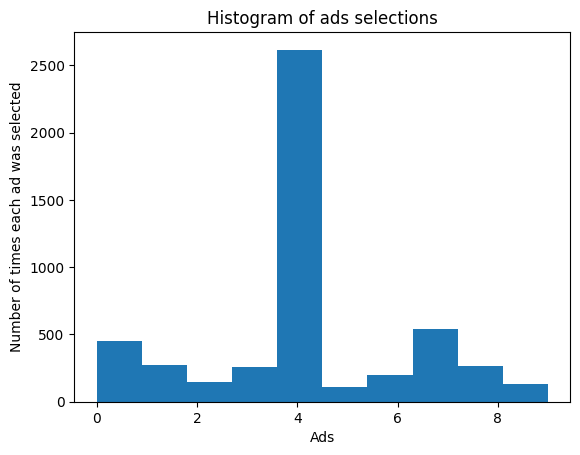

In [163]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()

## Thompson Sampling Algorithm

### Data Prep

#### Read

In [169]:
dataset = pd.read_csv('data/ReinforcementData1.csv')
dataset.head(2)

,Ad 1,Ad 2,Ad 3,Ad 4,Ad 5,Ad 6,Ad 7,Ad 8,Ad 9,Ad 10
0,1,0,0,0,1,0,0,0,1,0
1,0,0,0,0,0,0,0,0,1,0


### Implement Thompson Sampling

In [212]:
import random

N = 5000   # Number of rounds for which to run the test (rows in the dataset)
d = 10      # Total number of options (columns in the dataset)
ads_selected = []
numbers_of_rewards_1 = [0] * d  # the number of times selection of the option i resulted in a reward ($N_i^1(n)$)
numbers_of_rewards_0 = [0] * d  # the number of times selection of the option i did not result in a reward ($N_i^0(n)$)
# total_reward = 0

In [213]:
numbers_of_rewards_1, numbers_of_rewards_0

([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [214]:
for n in range(0, N):
    ad = 0
    max_theta = 0
    for i in range(0, d):
        # print("ROUND {} LOOP {}:".format(n, i))
        # random.betavariate returns a random beta distribution floating number between 0 and 1
        random_beta = random.betavariate(numbers_of_rewards_1[i] + 1, numbers_of_rewards_0[i] + 1)
        # print("Random Beta: {}, Max Theta: {}".format(random_beta, max_theta))
        if (random_beta > max_theta):
            max_theta = random_beta
            ad = i
        ads_selected.append(ad)
        reward = dataset.values[n, ad]
        # print("Ad Selected: {}, Reward: {}".format(ads_selected, reward))
        if reward == 1:
            numbers_of_rewards_1[ad] = numbers_of_rewards_1[ad] + 1
        else:
            numbers_of_rewards_0[ad] = numbers_of_rewards_0[ad] + 1
        # print("Number of rewards 1: {}, Number of rewards 0: {}".format(numbers_of_rewards_1, numbers_of_rewards_0))
        # total_reward = total_reward + reward

### Vizualize

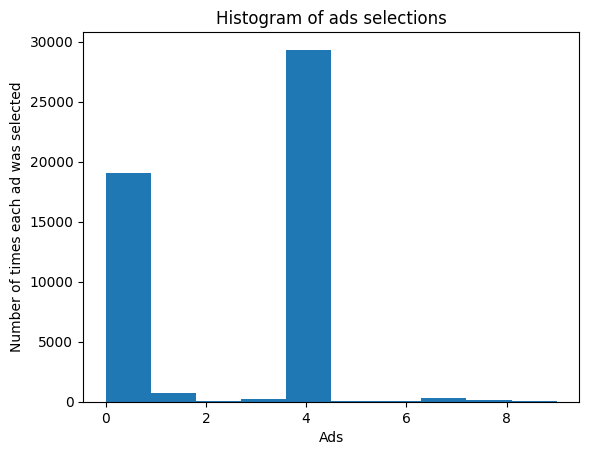

In [215]:
plt.hist(ads_selected)
plt.title('Histogram of ads selections')
plt.xlabel('Ads')
plt.ylabel('Number of times each ad was selected')
plt.show()